In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Configuración para evitar algunos mensajes de advertencia
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
# 1 Cargar el dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalizar los datos para tener valores de pixel entre 0 y 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Cambiar el shape de las imágenes para indicar que son en escala de grises
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# Convertir las etiquetas a categorías one-hot
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# División de los datos de entrenamiento en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Mostrar la forma de los conjuntos de datos para confirmar su correcta preparación
print("Tamaño del conjunto de entrenamiento:", x_train.shape)
print("Tamaño del conjunto de validación:", x_val.shape)
print("Tamaño del conjunto de prueba:", test_images.shape)


Tamaño del conjunto de entrenamiento: (48000, 28, 28, 1)
Tamaño del conjunto de validación: (12000, 28, 28, 1)
Tamaño del conjunto de prueba: (10000, 28, 28, 1)


In [3]:
# 2 MODELO CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
750/750 [==============================] - 28s 35ms/step - loss: 0.6188 - accuracy: 0.7759 - val_loss: 0.4064 - val_accuracy: 0.8542
Epoch 2/10
750/750 [==============================] - 34s 45ms/step - loss: 0.4118 - accuracy: 0.8516 - val_loss: 0.3330 - val_accuracy: 0.8777
Epoch 3/10
750/750 [==============================] - 34s 46ms/step - loss: 0.3556 - accuracy: 0.8723 - val_loss: 0.3203 - val_accuracy: 0.8804
Epoch 4/10
750/750 [==============================] - 34s 45ms/step - loss: 0.3269 - accuracy: 0.8829 - val_loss: 0.3002 - val_accuracy: 0.8835
Epoch 5/10
750/750 [==============================] - 34s 45ms/step - loss: 0.3005 - accuracy: 0.8905 - val_loss: 0.2671 - val_accuracy: 0.9006
Epoch 6/10
750/750 [==============================] - 33s 45ms/step - loss: 0.2841 - accuracy: 0.8979 - val_loss: 0.2625 - val_accuracy: 0.9034
Epoch 7/10
750/750 [==============================] - 34s 46ms/step - loss: 0.2660 - accuracy: 0.9031 - val_loss: 0.2615 - val_accuracy:

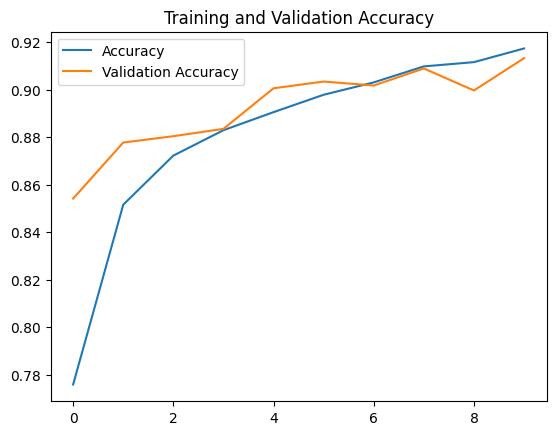

In [4]:
# 3 RENDIMIENTO
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()